# **IMPORT DRIVE**

In [ ]:
from google.colab import drive
csv_data = drive.mount('/my-drive')

Mounted at /my-drive


# **LOAD THE DATA**

In [ ]:
import pandas as pd
data = pd.read_csv('/my-drive/MyDrive/Colab Notebooks/MINI PROJECT/tweets.csv')
data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
print(data[data['location']=='arohaonces'])

          id  keyword    location  \
11366  11366  wrecked  arohaonces   

                                                    text  target  
11366  i feel directly attacked 💀 i consider moonbin ...       0  


# **DATA PREPROCESSING**

**UNWANTED ATTRIBUTES**

In [ ]:
data_new = data.drop(['id','keyword','location'],axis=1)
data_new.shape

(11370, 2)

**DATA CLEANING**

In [ ]:
import re
import string

In [ ]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>&')
    return html.sub(r'',text)

In [ ]:
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    
    return text 

In [ ]:
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

In [ ]:
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 


In [ ]:
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

In [ ]:
def remove_andper(text):
  text = re.sub('&lt;/?[a-z]+&gt;', '', text)
  text = text.replace('&amp;', '') 
  text = text.replace('&amp;amp;', 'and') 
  # text = text.replace('nd', 'and') 
  
  return text;

In [ ]:
data_new['text'] = data_new['text'].apply(lambda x : x.lower())
data_new['text'] = data_new['text'].apply(lambda x : remove_url(x))
data_new['text'] = data_new['text'].apply(lambda x : remove_emoji(x))

**VIEWING THE DATA**

In [ ]:
for col in data_new:
  if data_new[col].dtypes=='object':
    print(data_new[col].unique())
print("new")
print(data_new.text[11366])

['communal violence in bhainsa, telangana. "stones were pelted on muslims\' houses and some houses and vehicles were set ablaze…'
 'telangana: section 144 has been imposed in bhainsa from january 13 to 15, after clash erupted between two groups on january 12. po…'
 'arsonist sets cars ablaze at dealership ' ...
 'i feel directly attacked  i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this '
 'ok who remember "outcast" nd the "dora" au?? those au wrecked our nerves nd braincells jdkshssjhs legends'
 'jake corway wrecked while running 14th at irp.']
new
i feel directly attacked  i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this


****

# **CLASS LABEL COUNT**

In [ ]:
data_new.groupby('target').count()

,text
target,
0,9256
1,2114


In [ ]:
X = data_new.drop('target',axis='columns')
y = data_new['target']
X

,text
0,"communal violence in bhainsa, telangana. ""ston..."
1,telangana: section 144 has been imposed in bha...
2,arsonist sets cars ablaze at dealership
3,arsonist sets cars ablaze at dealership
4,"""lord jesus, your love brings freedom and pard..."
...,...
11365,media should have warned us well in advance. t...
11366,i feel directly attacked i consider moonbin &...
11367,i feel directly attacked i consider moonbin &...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? t..."


In [ ]:
y.value_counts()

0    9256
1    2114
Name: target, dtype: int64

#**UNDERSAMPLING**

In [ ]:
df_class_1 = data_new[data_new['target']==1]
df_class_0 = data_new[data_new['target']==0]
df_class_0.shape,df_class_1.shape

((9256, 2), (2114, 2))

In [ ]:
df_class_0_undersam = df_class_0.sample(df_class_1.shape[0])
df_class_0_undersam.shape,df_class_1.shape

((2114, 2), (2114, 2))

In [ ]:
df = pd.concat([df_class_0_undersam,df_class_1])
df

,text,target
3619,point about historic figure/monuments too blat...,0
2604,final assembly of one of our scenepro ci 200 t...,0
7193,imagine bts members having their own kid and t...,0
7825,first: establish parallel state. second: neutr...,0
1936,video about australian bush fires has been up ...,0
...,...,...
11338,kesian ular. we have wrecked their natural hab...,1
11354,"yeah, proper liverpool fans wrecked man city’s...",1
11355,"""trump and sisi 'rejected foreign exploitation...",1
11359,"""trump and sisi 'rejected foreign exploitation...",1


# **SPLITING INTO TRAINING AND TEST DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'],stratify = df['target'])

In [ ]:
X_train.head(4)

8730     men unloading corpses from truck in preparatio...
7379     thesiger chelmsford was the viceroy of india (...
10712    19.00 obs from #kirkwall airport showed sustai...
1284     not denying this comparison but this article w...
Name: text, dtype: object

**TENSORFLOW TEXT DOWNLOAD**

In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 30.5 MB/s 
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 438 kB 75.0 MB/s 
     |████████████████████████████████| 1.6 MB 74.6 MB/s 
     |████████████████████████████████| 5.8 MB 64.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [ ]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **BERT MODEL**



# **LOAD PREPROCESSOR AND ENCODER**

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

**CUSTOM LAYERS ADDED**

In [ ]:
#Bert Layer
text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
output = get_sentence_embedding(text_input)

# Neural Network Layer
hidden1 = tf.keras.layers.Dropout(0.1,name='dropout')(output)
hidden2 = tf.keras.layers.Dense(1, activation='sigmoid',name = 'hidden')(hidden1)
l = tf.keras.layers.Dense(1, activation='sigmoid',name = 'output')(hidden2)
# final model
model = tf.keras.Model(inputs = [text_input],outputs=[l])


**MODEL SUMMARY**

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

**ADDING REQUIRED METRICS**

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
]
model.compile(optimizer = 'adam',
              loss ='binary_crossentropy',
              metrics = METRICS)

#**TRAIN THE MODEL ON THE DATASET**

In [ ]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
100/100 [==============================] - 31s 309ms/step - loss: 0.4809 - accuracy: 0.7893 - precision: 0.7907 - recall: 0.7868
Epoch 2/10
100/100 [==============================] - 31s 312ms/step - loss: 0.4800 - accuracy: 0.7909 - precision: 0.7933 - recall: 0.7868
Epoch 3/10
100/100 [==============================] - 31s 313ms/step - loss: 0.4752 - accuracy: 0.7938 - precision: 0.7948 - recall: 0.7918
Epoch 4/10
100/100 [==============================] - 31s 314ms/step - loss: 0.4744 - accuracy: 0.7938 - precision: 0.7963 - recall: 0.7893
Epoch 5/10
100/100 [==============================] - 32s 318ms/step - loss: 0.4771 - accuracy: 0.7931 - precision: 0.7934 - recall: 0.7924
Epoch 6/10
100/100 [==============================] - 31s 315ms/step - loss: 0.4719 - accuracy: 0.7915 - precision: 0.7924 - recall: 0.7899
Epoch 7/10
100/100 [==============================] - 32s 315ms/step - loss: 0.4752 - accuracy: 0.7890 - precision: 0.7881 - recall: 0.7905
Epoch 8/10
100/100 [

#**TESTING THE MODEL**

In [ ]:
model.evaluate(X_test,y_test)

34/34 [==============================] - 10s 301ms/step - loss: 0.4719 - accuracy: 0.7947 - precision: 0.7746 - recall: 0.8318


[0.4719280004501343,
 0.7947019934654236,
 0.7746478915214539,
 0.8317580223083496]

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[430,  99],
       [101, 427]])

#**CONFUSION MATRIX**

Text(33.0, 0.5, 'Truth')

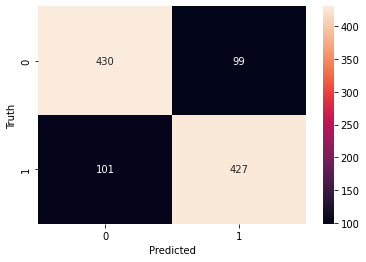

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       529
           1       0.81      0.81      0.81       528

    accuracy                           0.81      1057
   macro avg       0.81      0.81      0.81      1057
weighted avg       0.81      0.81      0.81      1057



#**SAVING THE MODEL**

In [ ]:

model.save('/my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model')

INFO:tensorflow:Assets written to: /my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model/assets


INFO:tensorflow:Assets written to: /my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model/assets


In [ ]:
!ls /my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('/my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model')

#**GRADIO INTERACTIVE DEMO**

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 20.0 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 212 kB 79.6 MB/s 
     |████████████████████████████████| 256 kB 77.1 MB/s 
     |████████████████████████████████| 2.0 MB 67.8 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
     |████████████████████████████████| 271 kB 75.5 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 78.2 MB/s 
     |████████████████████████████████| 11.1 MB 53.7 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 80 kB 11.8 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.0

**Load Model**

In [ ]:
def loadModel():
  return tf.keras.models.load_model('/my-drive/MyDrive/Colab_Notebooks/MINI_PROJECT/saved_bert_model')
loadedModel = loadModel()

In [ ]:
def output(s):
  embedded = [s]
  y_predicted = loadedModel.predict(embedded)
  y_predicted = y_predicted.flatten()
  return 'FACTUAL' if y_predicted>0.6 else 'NON-FACTUAL'


In [ ]:
import gradio as gr

def greet(Sentence):
  return output(Sentence)

demo = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(lines=2, placeholder="Enter Tweet or News..."),
    outputs="text",
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55043.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fb0a24ac9d0>,
 'http://127.0.0.1:7860/',
 'https://55043.gradio.app')